# Using Tractor catalog for positions

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.wcs import WCS
from astropy.utils import data as data_utils
from astropy.nddata import bitmask

# version dependencies are currently an issue
import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np

# import json
# import requests
from dl import authClient as ac, queryClient as qc
import pandas as pd

## Image query

In [10]:
def query_tractor(ra_b, dec_b, dist):
    """Queries the Astro Data Lab for the ra, dec and mag_g of the objects within a square of side length (dist).     
    dist is in degrees
    """
    #Bounds of the square we are querying objects for
    ra_min=ra_b
    ra_max = ra_b + dist
    dec_min=dec_b
    dec_max = dec_b + dist

    query = f"""
    SELECT ra, dec, mag_g
    FROM ls_dr10.tractor_s
    WHERE ra >= ({ra_min}) AND ra < ({ra_max})
    AND dec >= ({dec_min}) AND dec < ({dec_max})
    AND mag_g <= 21 AND mag_g >= 16
    """

    print(query)
    
    print("Querying the Astro Data Lab...")
    # check if this completes successfuly
    brick_info = qc.query(sql=query, fmt="pandas")
    return brick_info

#tractor_df = query_tractor(100, -25, 1.0)

In [ ]:
for ra_b in [0,1]:
    for dec_b in [-90,-89]:
        info=query_tractor(ra_b,dec_b,dist=1)
    print(info)


    SELECT ra, dec, mag_g
    FROM ls_dr10.tractor_s
    WHERE ra >= (0) AND ra < (1)
    AND dec >= (-90) AND dec < (-89)
    LIMIT 10
    
Querying the Astro Data Lab...

    SELECT ra, dec, mag_g
    FROM ls_dr10.tractor_s
    WHERE ra >= (0) AND ra < (1)
    AND dec >= (-89) AND dec < (-88)
    LIMIT 10
    
Querying the Astro Data Lab...
         ra        dec      mag_g
0  0.363933 -88.993322  23.143320
1  0.465381 -88.992656  24.622776
2  0.366198 -88.992654  23.771152
3  0.327409 -88.991996  23.469210
4  0.607975 -88.991147  23.872120
5  0.592594 -88.989329  24.037241
6  0.075726 -88.988294  22.835636
7  0.771528 -88.986968  22.760027
8  0.849746 -88.986807  22.882387
9  0.053733 -88.986357  24.651476

    SELECT ra, dec, mag_g
    FROM ls_dr10.tractor_s
    WHERE ra >= (1) AND ra < (2)
    AND dec >= (-90) AND dec < (-89)
    LIMIT 10
    
Querying the Astro Data Lab...

    SELECT ra, dec, mag_g
    FROM ls_dr10.tractor_s
    WHERE ra >= (1) AND ra < (2)
    AND dec >= (-89)

## Get bitmask info

In [ ]:
# there will be a text file to read from at some point lol

## Segmentation map

Start with OG seg map, without bitmask stuff yet

In [35]:
# masking for low magnitude objects

def mask_radius(mag_g, fov_radius=20):

    return (fov_radius/3600) + 1630./3600. * 1.396**(-mag_g)

rad = mask_radius(tractor_df['mag_g'])

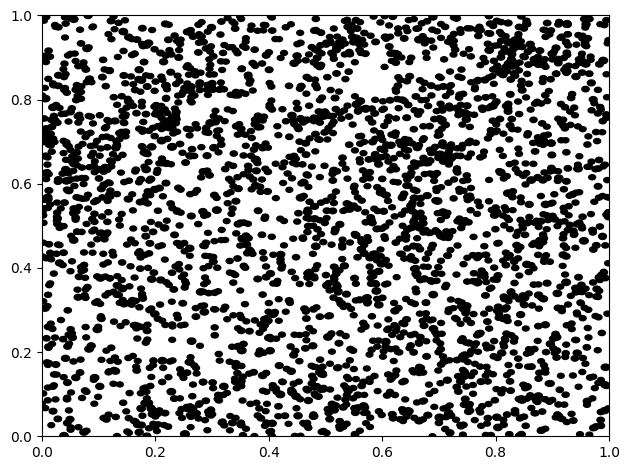

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(ra_min,ra_max)
ax.set_ylim(dec_min, dec_max)

for x, y, r in zip(tractor_df['ra'], tractor_df['dec'], rad):
    c = plt.Circle((x,y), r, color='black')
    ax.add_patch(c)

plt.tight_layout()
plt.show()

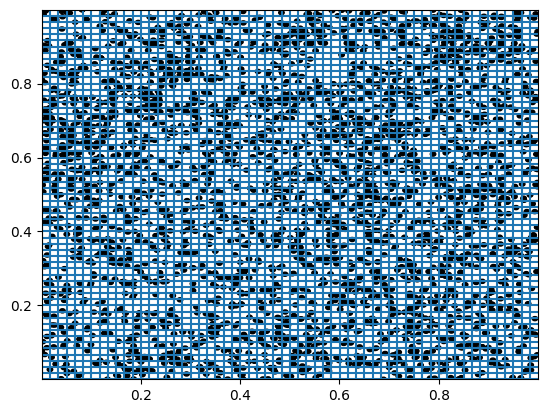

In [46]:
ra = tractor_df['ra']
dec = tractor_df['dec']

def create_grid():

    # Creating exclusion map with grid
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlim((min(ra),max(ra)))
    ax.set_ylim((min(dec),max(dec)))

    for x, y, r in zip(ra, dec, rad):
        c = plt.Circle((x,y), 0.005556, color='black', fill='false')
        ax.add_patch(c)

    plt.vlines(np.arange(min(ra),max(ra),(60/3600)), min(dec), max(dec))
    plt.hlines(np.arange(min(dec),max(dec),(60/3600)), min(ra), max(ra))
    plt.margins(0)
    plt.show()

    return

create_grid()